In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
from scipy import signal

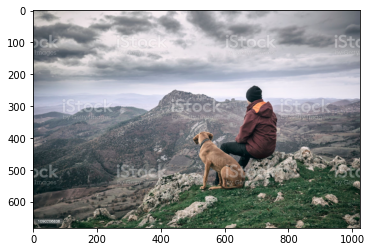

In [6]:
im = plt.imread(r"C:\Users\user\Desktop\Important\AI_project.jpg")[:,:,:3]
plt.imshow(im)

# image blurring

In [7]:
im2gray = cv2.cvtColor(im , cv2.COLOR_RGB2GRAY)

In [9]:
smoothing_mask = np.ones((15,15))/225

In [13]:
imblurred = signal.convolve2d(im2gray , smoothing_mask , 
                                boundary = 'symm', mode= 'same') # boundary = symmetric also known as symmetric reflectance 
# resultant image same size so do mode = same .

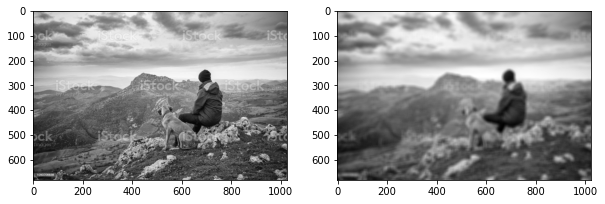

In [15]:
fig , (ax1 , ax2 )= plt.subplots(1,2 , figsize = (10,15))
ax1.imshow(im2gray , cmap='gray')
ax2.imshow(imblurred , cmap='gray')

# Edge detection

In [16]:
Xmask = np.array([[-1,0,1],[-1,0,1 ],[-1,0,1] ])
Ymask = Xmask.T.copy()

In [18]:
fx = signal.convolve2d(im2gray , Xmask , 
                          boundary='symm' , mode = 'same')
fy = signal.convolve2d(im2gray , Ymask , 
                          boundary='symm' , mode = 'same')


In [19]:
fx.shape 

(682, 1024)

In [20]:
im2gray.shape 

(682, 1024)

In [21]:
GM = (fx**2 + fy**2)**0.5

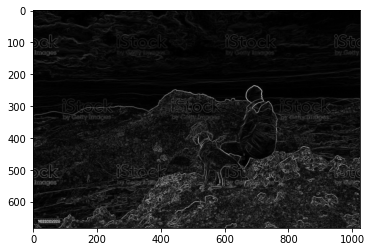

In [22]:
plt.imshow(GM , cmap='gray')

In [23]:
threshold = GM.max()-2GM.std()

In [24]:
threshold

520.1558724198325

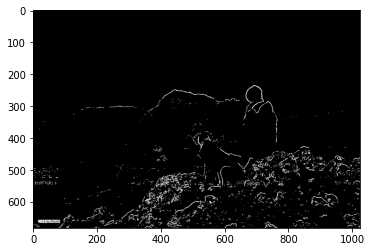

In [29]:
Edge = GM > 200
plt.imshow(Edge , cmap='gray') # to get sufficient threshold u can apply hysterical threshold method and to see more thin lines
# apply non maxima suppression as in canny object detectiojn .

# Image sharpening

In [38]:
imSharpened = imblurred + 2*GM 

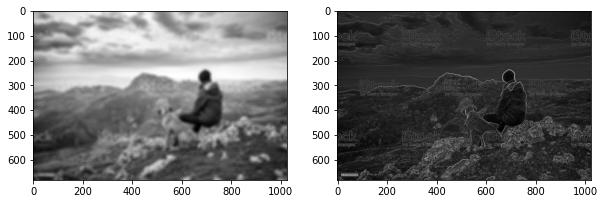

In [39]:
fig , (ax1 , ax2 ) = plt.subplots(1,2 ,figsize =(10,15))
ax1.imshow(imblurred , cmap= 'gray')
ax2.imshow(imSharpened , cmap='gray')

In [40]:
# convolution has various applications , building blocks for CNNS .